In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import yfinance as yf
import pandas as pd

In [6]:
# Define the stocks
primary_stock = 'PEP'
competitor_stock = 'KO'
stocks = [primary_stock, competitor_stock]

In [7]:
# Fetch historical data
start_date = '2010-01-02'
end_date = '2024-02-12'

In [8]:
data = yf.download(stocks, start=start_date, end=end_date)['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [9]:
data.head()

Ticker,KO,PEP
Date,,
2010-01-04,17.818310,39.133671
2010-01-05,17.602766,39.606541
2010-01-06,17.596521,39.210358
2010-01-07,17.552782,38.961132
2010-01-08,17.227909,38.833332


In [ ]:
data.tail()

Ticker,KO,PEP
Date,,
2024-02-05,57.833836,164.165009
2024-02-06,57.737514,164.645248
2024-02-07,57.785683,164.693253
2024-02-08,57.631557,166.979202
2024-02-09,57.371479,161.043457


In [10]:
data.shape

(3550, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3550 entries, 2010-01-04 to 2024-02-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KO      3550 non-null   float64
 1   PEP     3550 non-null   float64
dtypes: float64(2)
memory usage: 83.2 KB


In [12]:
data.isnull().sum()

,0
Ticker,
KO,0
PEP,0


# Handle missing values by filling with the mean or median, whichever is best
# if data.isnull().sum().sum() > 0:
   # data.fillna(data.median(), inplace=True

#data.isnull().sum()

In [13]:
data.describe()

Ticker,KO,PEP
count,3550.000000,3550.000000
mean,36.074887,91.594394
std,11.981092,40.552791
min,15.772166,37.676693
25%,27.168575,57.639499
50%,33.667835,83.537933
75%,45.228518,118.879225
max,60.509617,184.349792


In [14]:
data.value_counts()

,,count
KO,PEP,
60.281128,160.612381,2
39.776371,92.323975,1
39.807693,94.624237,1
39.817577,93.249466,1
39.825565,114.347351,1
...,...,...
29.344866,70.782898,1
29.350012,71.469513,1
29.371859,70.403404,1


### Feature Engineering

* Computing the stocks the Return feature
* Creating a "tomorrow" column (next day's close price)
* Creating a "stocks-Direction" column (tomorrow's price > adj Close Price) : The direction column provides binary observations of daily price movements, indicating whether the stock price moved up or down (Target feature)

In [ ]:
# Compute daily percentage change (returns) for all stocks
returns_df = data.pct_change()

# Rename columns to indicate returns
returns_df = returns_df.add_suffix("_Return")

# Merge returns with original dataset
data = data.join(returns_df)

# Drop NaN values caused by first-day percentage change
data.dropna(inplace=True)

# Save dataset with computed returns
data.to_csv("stock_returns_data.csv")

# Show first rows
print("Stock returns computed successfully and saved as 'stock_returns_data.csv'")
print(data.head())

Stock returns computed successfully and saved as 'stock_returns_data.csv'
Ticker             KO        PEP  KO_Return  PEP_Return
Date                                                   
2010-01-05  17.602770  39.606537  -0.012097    0.012083
2010-01-06  17.596521  39.210346  -0.000355   -0.010003
2010-01-07  17.552786  38.961128  -0.002485   -0.006356
2010-01-08  17.227911  38.833317  -0.018508   -0.003280
2010-01-11  17.577780  38.788582   0.020308   -0.001152


In [ ]:
# Load stock returns dataset
data = pd.read_csv("stock_returns_data.csv", parse_dates=["Date"], index_col="Date")

# Create a "Tomorrow" column for each stock (next day's adjusted close price)
for stock in [ "PEP", "KO"]:
    data[f"{stock}_Tomorrow"] = data[stock].shift(-1)

# Drop the last row since it will have NaN in the "Tomorrow" column
data.dropna(inplace=True)

# Save updated dataset
data.to_csv("stock_with_tomorrow.csv")

# Show first rows
print("Tomorrow column created successfully and saved as 'stock_with_tomorrow.csv'")
print(data.head())

Tomorrow column created successfully and saved as 'stock_with_tomorrow.csv'
                   KO        PEP  KO_Return  PEP_Return  PEP_Tomorrow  \
Date                                                                    
2010-01-05  17.602770  39.606537  -0.012097    0.012083     39.210346   
2010-01-06  17.596521  39.210346  -0.000355   -0.010003     38.961128   
2010-01-07  17.552786  38.961128  -0.002485   -0.006356     38.833317   
2010-01-08  17.227911  38.833317  -0.018508   -0.003280     38.788582   
2010-01-11  17.577780  38.788582   0.020308   -0.001152     39.331776   

            KO_Tomorrow  
Date                     
2010-01-05    17.596521  
2010-01-06    17.552786  
2010-01-07    17.227911  
2010-01-08    17.577780  
2010-01-11    17.768322  


In [ ]:
# Load dataset with Tomorrow's prices
data = pd.read_csv("stock_with_tomorrow.csv", parse_dates=["Date"], index_col="Date")

# Create Stock_Direction column for each stock
for stock in ["PEP", "KO"]:
    data[f"{stock}_Direction"] = (data[f"{stock}_Tomorrow"] > data[stock]).astype(int)

# Drop last row since "Tomorrow" values won't exist for the last date
data.dropna(inplace=True)

# Save updated dataset
data.to_csv("stock_with_direction.csv")

# Show first rows
print("Stock_Direction column created successfully and saved as 'stock_with_direction.csv'")
print(data.tail())

Stock_Direction column created successfully and saved as 'stock_with_direction.csv'
                   KO         PEP  KO_Return  PEP_Return  PEP_Tomorrow  \
Date                                                                     
2024-02-02  58.315468  164.213013  -0.007215   -0.004252    164.165009   
2024-02-05  57.833836  164.165009  -0.008259   -0.000292    164.645248   
2024-02-06  57.737514  164.645248  -0.001665    0.002925    164.693253   
2024-02-07  57.785683  164.693253   0.000834    0.000292    166.979202   
2024-02-08  57.631557  166.979202  -0.002667    0.013880    161.043457   

            KO_Tomorrow  PEP_Direction  KO_Direction  
Date                                                  
2024-02-02    57.833836              0             0  
2024-02-05    57.737514              1             0  
2024-02-06    57.785683              1             1  
2024-02-07    57.631557              1             0  
2024-02-08    57.371479              0             0  


### Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

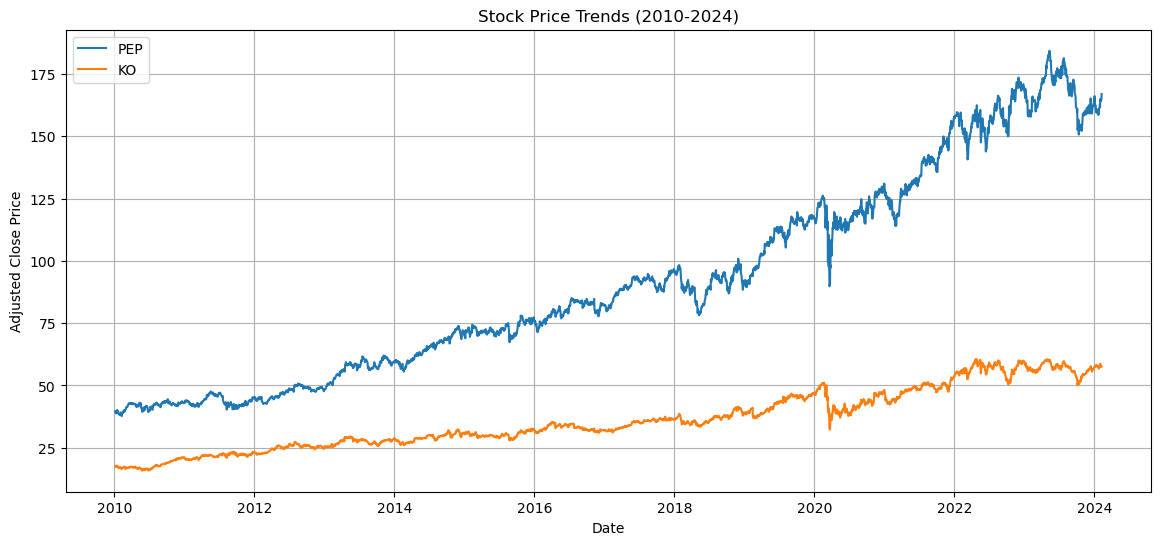

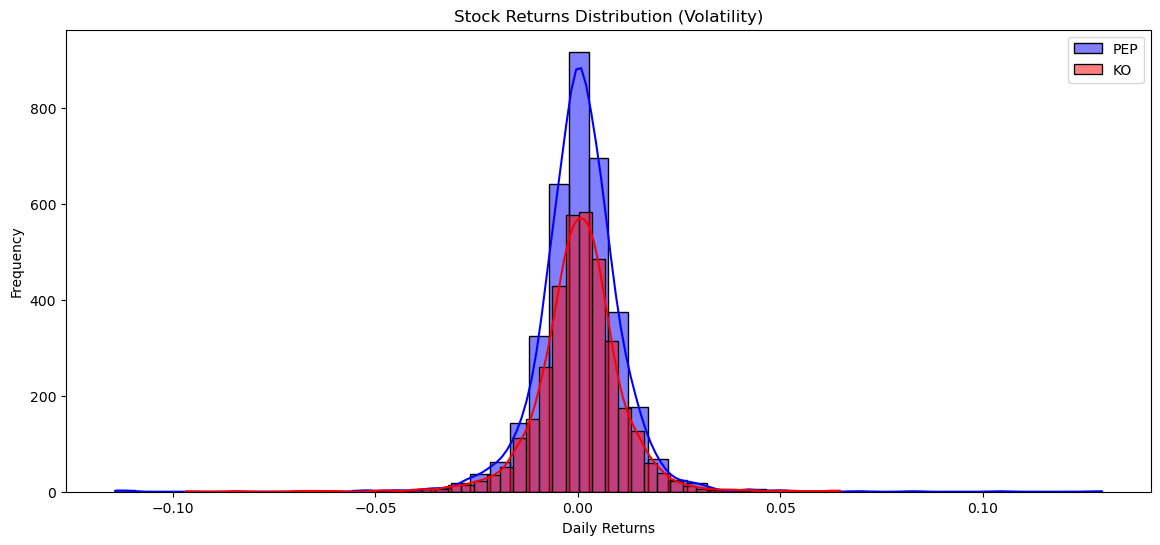

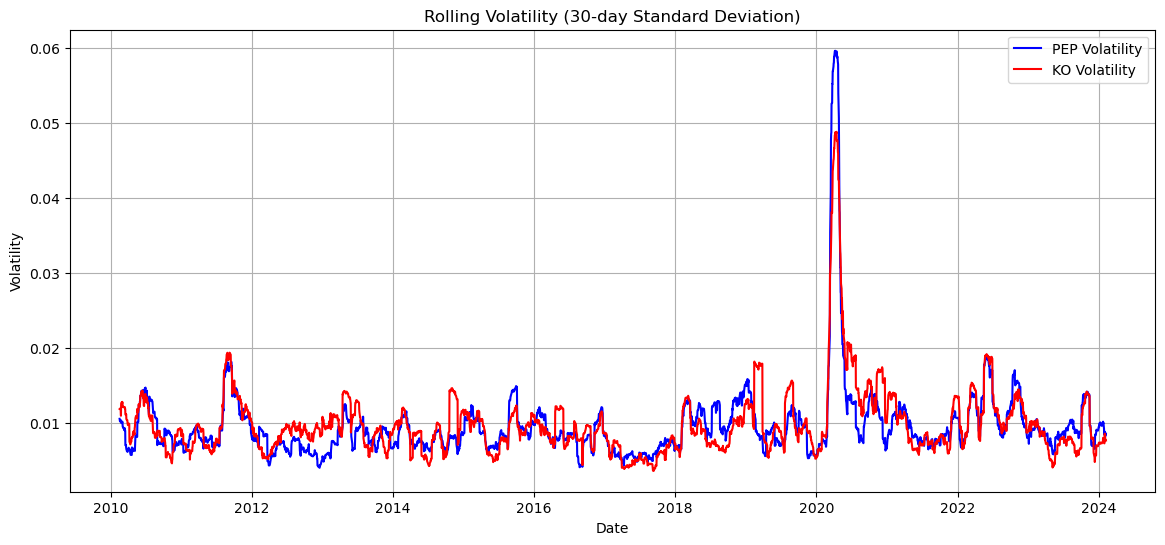

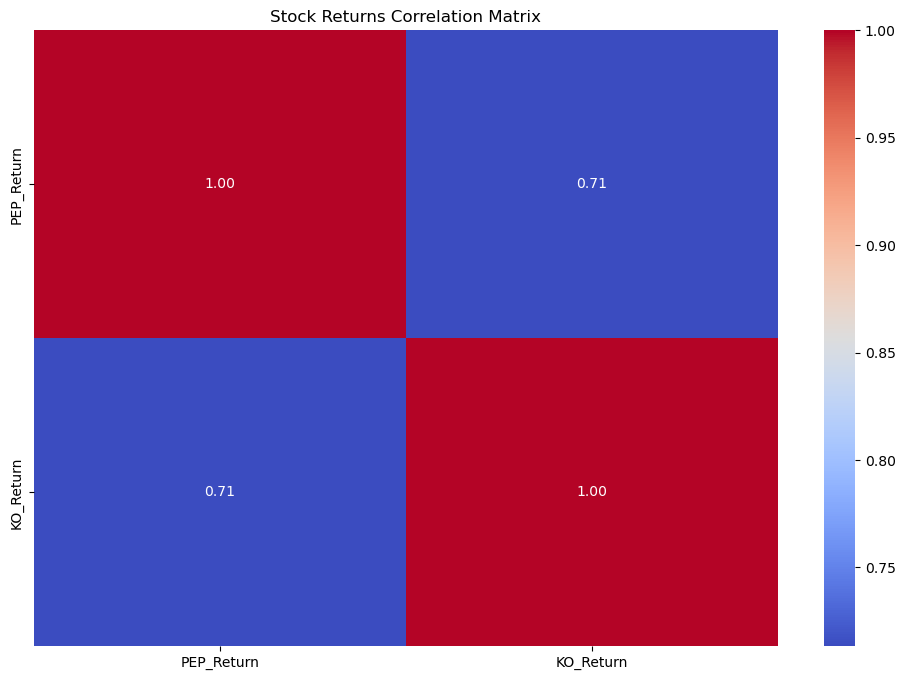

In [ ]:
### 1️**Stock Price Trends Over Time**
plt.figure(figsize=(14, 6))
for stock in ["PEP","KO"]:
    plt.plot(data.index, data[stock], label=stock)

plt.title("Stock Price Trends (2010-2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid()
plt.show()

### 2️**Returns Distribution (Volatility Analysis)**
plt.figure(figsize=(14, 6))
sns.histplot(data["PEP_Return"], bins=50, kde=True, color="blue", label="PEP")
sns.histplot(data["KO_Return"], bins=50, kde=True, color="red", label="KO")
plt.title("Stock Returns Distribution (Volatility)")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 3️ **Rolling Volatility (30-day Standard Deviation)**
plt.figure(figsize=(14, 6))
data["PEP_Rolling_Volatility"] = data["PEP_Return"].rolling(window=30).std()
data["KO_Rolling_Volatility"] = data["KO_Return"].rolling(window=30).std()

plt.plot(data.index, data["PEP_Rolling_Volatility"], label="PEP Volatility", color="blue")
plt.plot(data.index, data["KO_Rolling_Volatility"], label="KO Volatility", color="red")

plt.title("Rolling Volatility (30-day Standard Deviation)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

### 4️ **Correlation Matrix of Stock Returns**
plt.figure(figsize=(12, 8))
sns.heatmap(data[["PEP_Return", "KO_Return"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Returns Correlation Matrix")
plt.show()

In [ ]:
# Compute rolling volatility (30-day moving standard deviation)
rolling_volatility = returns.rolling(window=30).std()

In [ ]:
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np

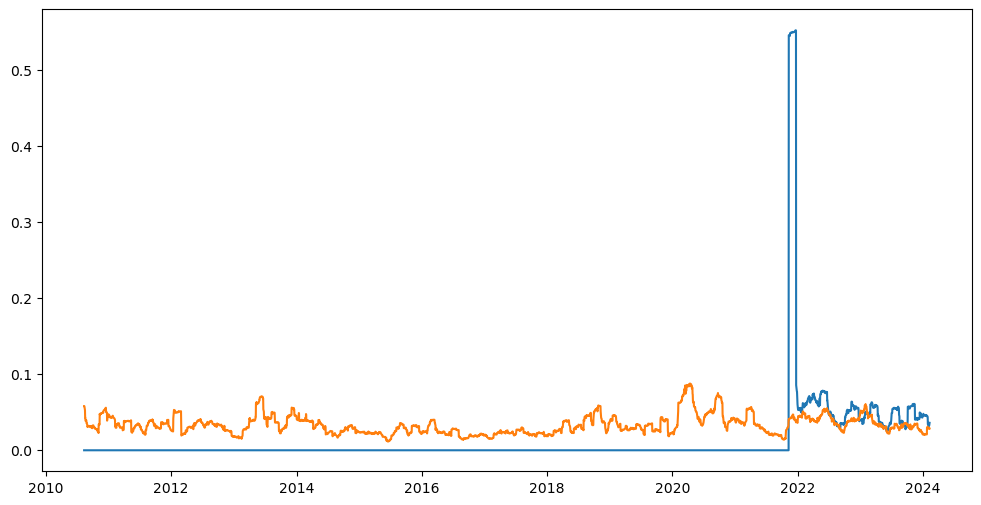

In [ ]:
# Plot rolling volatility
plt.figure(figsize=(12, 6))
for stock in rolling_volatility.columns:
    plt.plot(rolling_volatility.index, rolling_volatility[stock], label=stock)

In [ ]:
# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Stock Market Trends & Financial Health", style={"text-align": "center"}),

    # Dropdown to select stock
    dcc.Dropdown(
        id="stock_selector",
        options=[{"label": stock, "value": stock} for stock in ["NVDA", "TSLA", "JNJ", "KO", "PEP", "RIVN", "^GSPC"]],
        value="NVDA",
        multi=False,
        style={"width": "50%"}
    ),

    # Line chart for stock pricing trends
    dcc.Graph(id="price_chart"),

    # Histogram for stock returns distribution (volatility)
    dcc.Graph(id="returns_histogram"),

    # Correlation heatmap for sector impacts
    dcc.Graph(id="correlation_heatmap"),
])

In [ ]:
# Callbacks for updating charts
@app.callback(
    Output("price_chart", "figure"),
    Output("returns_histogram", "figure"),
    Output("correlation_heatmap", "figure"),
    Input("stock_selector", "value")
)
def update_charts(selected_stock):
    # Pricing Trend Chart
    fig_price = px.line(
        stock_data, x="Date", y=selected_stock,
        title=f"Price Trends for {selected_stock}",
        labels={"Date": "Date", selected_stock: "Stock Price"},
        template="plotly_dark"
    )

    # Returns Distribution (Volatility)
    fig_returns = px.histogram(
        stock_data, x=f"{selected_stock}_Return", nbins=50,
        title=f"Returns Distribution for {selected_stock}",
        template="plotly_dark"
    )

    # Correlation Heatmap for Sector Impacts
    sector_stocks = ["NVDA_Return", "TSLA_Return", "JNJ_Return", "KO_Return", "PEP_Return", "RIVN_Return", "^GSPC_Return"]
    correlation_matrix = stock_data[sector_stocks].corr()
    fig_correlation = px.imshow(
        correlation_matrix, text_auto=True, title="Stock Returns Correlation Heatmap",
        labels=dict(color="Correlation"), template="plotly_dark"
    )
    return fig_price, fig_returns, fig_correlation

# Run app
if __name__ == "__main__":
    app.run(debug=True)


In [ ]:
# Compare stock performance to market index if available
if market_index in cumulative_returns.columns:
    performance_comparison = cumulative_returns / cumulative_returns.iloc[0]  # Normalize to 1 at start
else:
    performance_comparison = cumulative_returns

In [ ]:
print("\nPerformance Comparison (Normalized):")
print(performance_comparison.tail())


Performance Comparison (Normalized):
Ticker          RIVN        TSLA
Date                            
2024-02-05  0.591215  113.683525
2024-02-06  0.613376  116.220157
2024-02-07  0.600317  117.777290
2024-02-08  0.637515  119.020485
2024-02-09  0.660071  121.538281


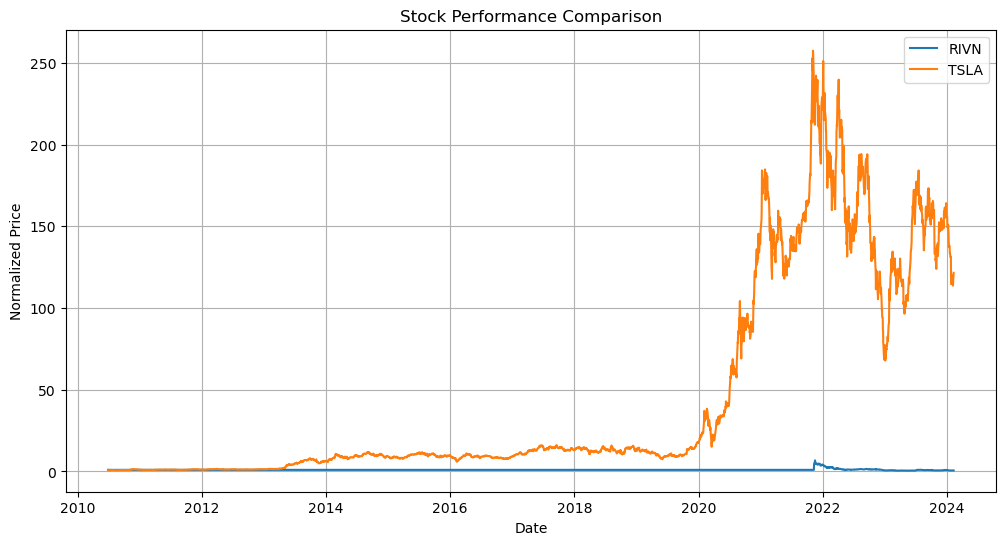

In [ ]:
#Plot the performance comparison
plt.figure(figsize=(12, 6))
for stock in performance_comparison.columns:
    plt.plot(performance_comparison.index, performance_comparison[stock], label=stock)

plt.title("Stock Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  3 of 3 completed


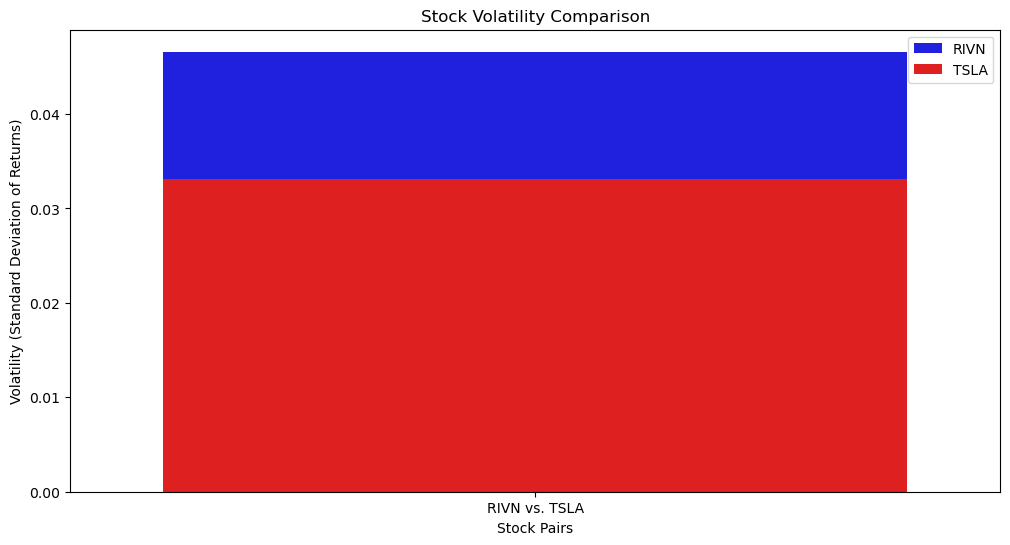

Comparative Analysis of Stocks Based on Volatility & Suitability for Investment:
      Stock Pair Stock 1 Stock 2  Volatility 1  Volatility 2    Beta 1  \
0  RIVN vs. TSLA    RIVN    TSLA      0.046598      0.033166  2.533379   

     Beta 2  Sharpe Ratio 1  Sharpe Ratio 2  
0  2.228246        0.049649        0.117372  
Based on risk-adjusted return (Sharpe Ratio), TSLA is the better investment option.


In [ ]:
# Define the stocks and market index
primary_stock = 'RIVN'
competitor_stock = 'TSLA'
market_index = '^GSPC'  # S&P 500 as the market benchmark
stocks = [primary_stock, competitor_stock, market_index]

# Fetch historical data
start_date = '2023-01-01'
end_date = '2024-01-01'

data = yf.download(stocks, start=start_date, end=end_date)['Close']

# Ensure market index is in the dataset
if market_index not in data.columns:
    print(f"Warning: Market index {market_index} data not found. Excluding from analysis.")
    data = data[[primary_stock, competitor_stock]]

# Check for missing values and handle them by filling with the median
data.fillna(data.median(), inplace=True)

# Calculate daily returns
data_returns = data.pct_change().dropna()
data_returns.columns = [f"{col}_Return" for col in data_returns.columns]

data = data.join(data_returns, how='left')

# Define stock pairs for comparison
stock_pairs = [(primary_stock, competitor_stock)]

# Store results
results = []

for stock1, stock2 in stock_pairs:
    stock1_volatility = data[f"{stock1}_Return"].std()
    stock2_volatility = data[f"{stock2}_Return"].std()

    # Calculate Beta (Market Sensitivity)
    covariance1 = np.cov(data[f"{stock1}_Return"].dropna(), data[f"{market_index}_Return"].dropna())[0, 1]
    beta1 = covariance1 / np.var(data[f"{market_index}_Return"].dropna())

    covariance2 = np.cov(data[f"{stock2}_Return"].dropna(), data[f"{market_index}_Return"].dropna())[0, 1]
    beta2 = covariance2 / np.var(data[f"{market_index}_Return"].dropna())

    # Calculate Sharpe Ratio (Risk-Adjusted Return)
    stock1_sharpe = data[f"{stock1}_Return"].mean() / stock1_volatility
    stock2_sharpe = data[f"{stock2}_Return"].mean() / stock2_volatility

    results.append({
        "Stock Pair": f"{stock1} vs. {stock2}",
        "Stock 1": stock1,
        "Stock 2": stock2,
        "Volatility 1": stock1_volatility,
        "Volatility 2": stock2_volatility,
        "Beta 1": beta1,
        "Beta 2": beta2,
        "Sharpe Ratio 1": stock1_sharpe,
        "Sharpe Ratio 2": stock2_sharpe
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Stock Pair", y="Volatility 1", data=results_df, color="blue", label=primary_stock)
sns.barplot(x="Stock Pair", y="Volatility 2", data=results_df, color="red", label=competitor_stock)
plt.title("Stock Volatility Comparison")
plt.xlabel("Stock Pairs")
plt.ylabel("Volatility (Standard Deviation of Returns)")
plt.legend()
plt.show()

# Print results
print("Comparative Analysis of Stocks Based on Volatility & Suitability for Investment:")
print(results_df)

# Recommendation based on Sharpe Ratio
best_stock = primary_stock if results_df["Sharpe Ratio 1"].values[0] > results_df["Sharpe Ratio 2"].values[0] else competitor_stock
print(f"Based on risk-adjusted return (Sharpe Ratio), {best_stock} is the better investment option.")


### Modelling and Evaluation

We will now build two models to predict Stock Direction (Up = 1, Down = 0):

XGBoost (Gradient Boosting ML Model)

LSTM (Deep Learning Model)

Steps for Modeling & Evaluation

️1.Prepare Data → Feature selection, Train-Test Split (80:20)

️2. Train XGBoost Model → Classical ML approach

️3. Train LSTM Model → Deep Learning approach

️4. Evaluate Models → Accuracy, Precision, Recall, F1-Score

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature selection for machine learning
features = [col for col in data.columns if "Return" in col]
target = f"RIVN_Return"  # Using RIVN Return as target for prediction

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42
)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(y_train.unique())

[-0.0274295   0.02816025  0.08072495 -0.00591278  0.03946837  0.0234969
  0.05129876 -0.03617805  0.003432   -0.03233253  0.05571507 -0.00427757
 -0.03214776  0.01092891  0.04447857  0.02551694 -0.0156913  -0.01281141
  0.01341989  0.04406972 -0.04542074  0.01924926  0.05510751 -0.0080972
 -0.03905022  0.0023716   0.03012683  0.0582477   0.05232559  0.03430276
 -0.01022864 -0.00656456  0.0519931  -0.01608435  0.00687876 -0.01093642
  0.07100589  0.17406961  0.01396972 -0.0387965  -0.02222219  0.02786571
 -0.04416404  0.00371351  0.01241129  0.04385417 -0.04693485  0.02522935
 -0.02992653 -0.01783358 -0.03343238 -0.00516984  0.02598362 -0.09095475
  0.00897956  0.07633586  0.0339213  -0.01551804  0.00333333 -0.04679244
 -0.03286852  0.04248792  0.08670232 -0.04804928 -0.02092209         nan
 -0.06493505 -0.02912619 -0.02546455  0.03912153  0.14246068 -0.09879028
 -0.00800668 -0.06719655  0.03552124  0.03698927 -0.0020651   0.01267608
 -0.04730476  0.075       0.02189411 -0.01782251 -0.0

In [ ]:
# Convert return values to binary direction (1 for up, 0 for down)
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [ ]:
# Initialize XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train Model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate Model
print(" XGBoost Model Performance ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

 XGBoost Model Performance 
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Reshape Data for LSTM (3D: Samples, Time Steps, Features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(50),
    Dense(1, activation="sigmoid")
])

# Compile Model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Train Model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Predictions
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluate Model
print("🔹 LSTM Model Performance 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.4f}")
print(classification_report(y_test, y_pred_lstm))

C:\Users\Omast\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.5224 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5252 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4598 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5056 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5084 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5088 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4875 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4925 - loss: nan - val_accuracy: 0.4600 - val_loss: nan
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/ste

C:\Users\Omast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Omast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Omast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(data[target].isna().sum())

1


In [ ]:
data = data.dropna(subset=[target])

In [ ]:
# Select features (excluding tomorrow's prices)
features = [col for col in data.columns if "Return" in col]
target = f"RIVN_Return"  # Predicting if NVDA stock will go up (1) or down (0)

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42, stratify=data[target]
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store results
results = {}

### **1️ Train XGBoost Model**
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Store results
results["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Report": classification_report(y_test, y_pred_xgb, output_dict=True)
}

### **2️ Train LSTM Model**
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape for LSTM (3D: Samples, Time Steps, Features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(50),
    Dense(1, activation="sigmoid")
])

# Compile model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
# Train model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=0)

# Predictions
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Store results
results["LSTM"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lstm),
    "Report": classification_report(y_test, y_pred_lstm, output_dict=True)
}

### **3️ Compare Model Performance**
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (0)", "Precision (1)", "Recall (0)", "Recall (1)", "F1-Score (0)", "F1-Score (1)"],
    "XGBoost": [
        results["XGBoost"]["Accuracy"],
        results["XGBoost"]["Report"]["0"]["precision"],
        results["XGBoost"]["Report"]["1"]["precision"],
        results["XGBoost"]["Report"]["0"]["recall"],
        results["XGBoost"]["Report"]["1"]["recall"],
        results["XGBoost"]["Report"]["0"]["f1-score"],
        results["XGBoost"]["Report"]["1"]["f1-score"],
    ],
    "LSTM": [
        results["LSTM"]["Accuracy"],
        results["LSTM"]["Report"]["0"]["precision"],
        results["LSTM"]["Report"]["1"]["precision"],
        results["LSTM"]["Report"]["0"]["recall"],
        results["LSTM"]["Report"]["1"]["recall"],
        results["LSTM"]["Report"]["0"]["f1-score"],
        results["LSTM"]["Report"]["1"]["f1-score"],
    ]
})

# Print comparison table
print(comparison_df)

### **4️ Visualize Model Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="XGBoost", data=comparison_df, color="blue", label="XGBoost")
sns.barplot(x="Metric", y="LSTM", data=comparison_df, color="red", label="LSTM", alpha=0.7)
plt.title("XGBoost vs. LSTM: Model Performance Comparison")
plt.xticks(rotation=30)
plt.legend()
plt.show()


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.